<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_ID  50 non-null     int64 
 1   Date      50 non-null     object
 2   Product   50 non-null     object
 3   Category  50 non-null     object
 4   Quantity  50 non-null     int64 
 5   Price     50 non-null     int64 
 6   State     50 non-null     object
 7   City      50 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.3+ KB


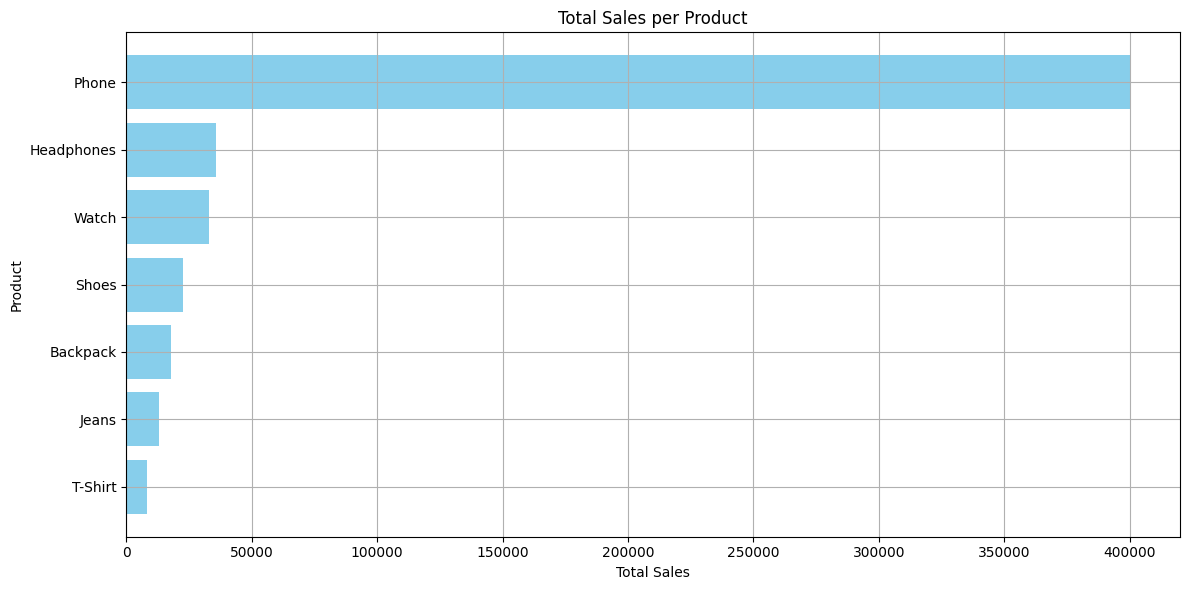

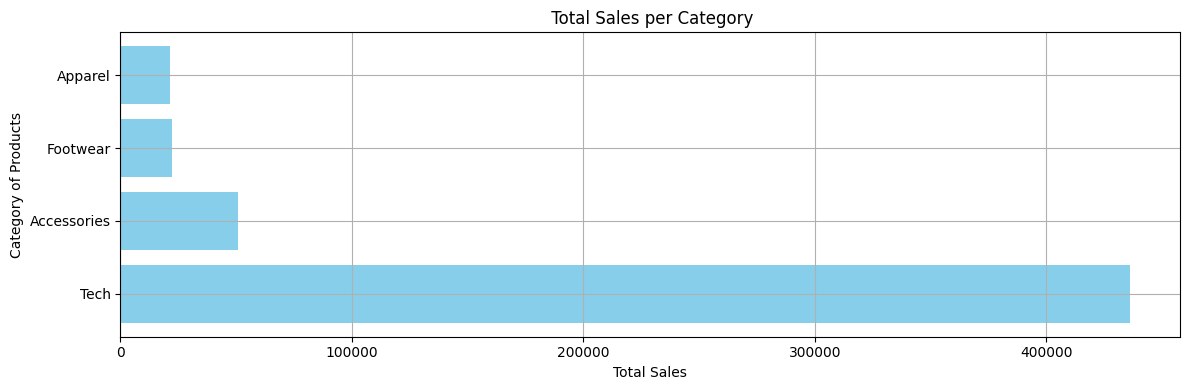

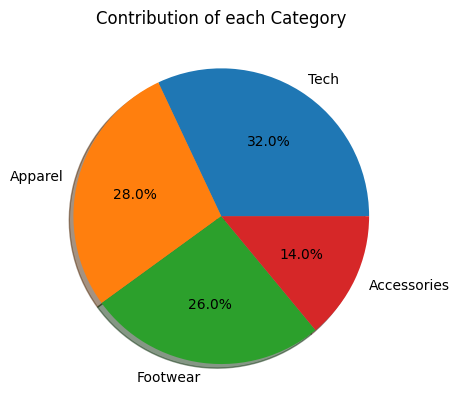

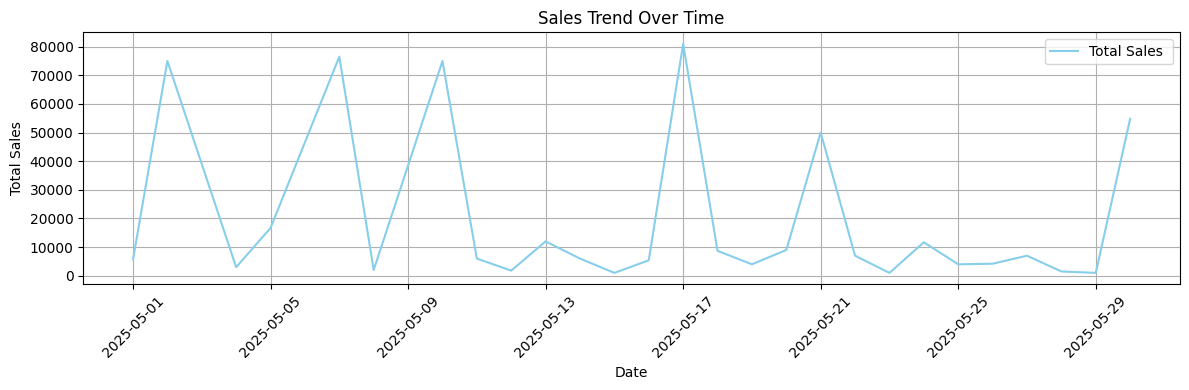

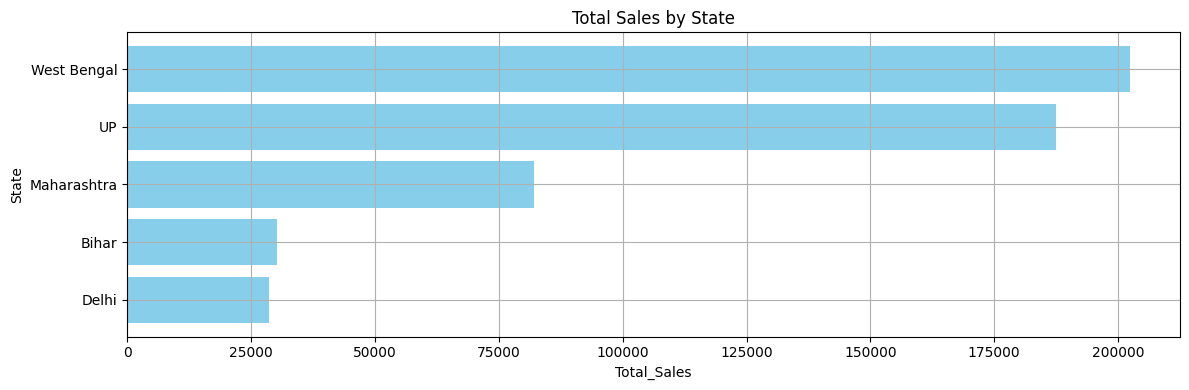

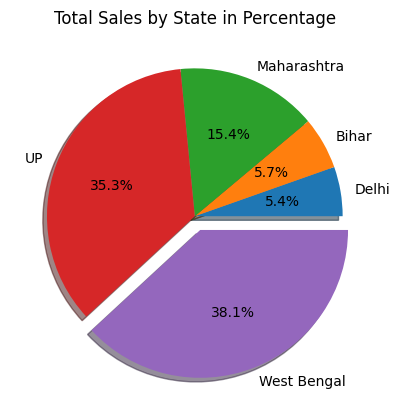

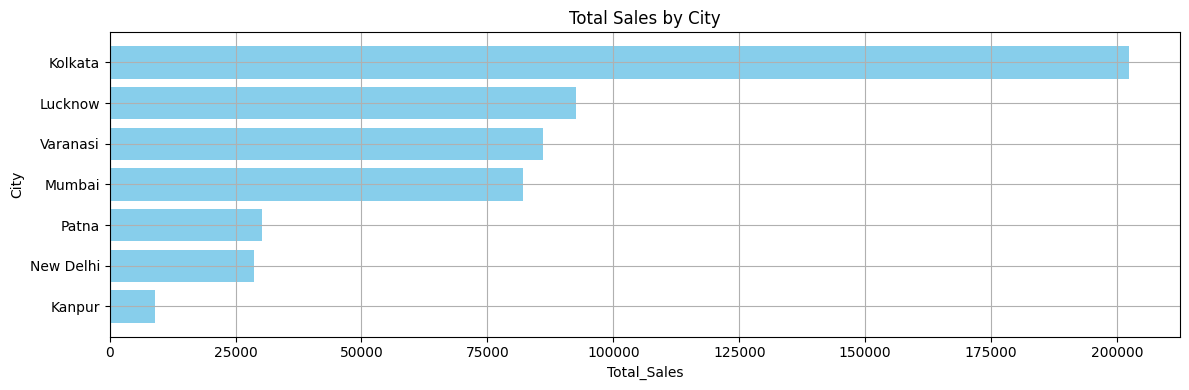

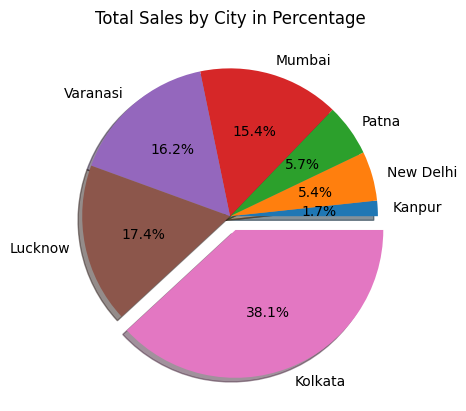

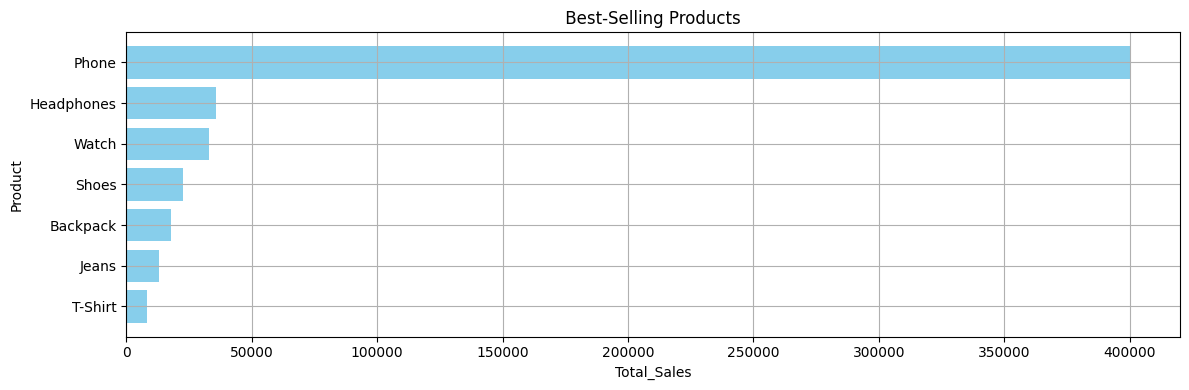

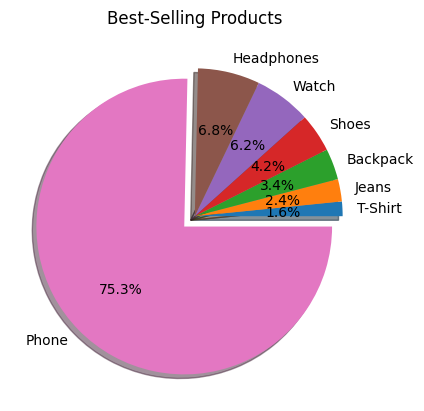

C:\Users\kbara\AppData\Local\Temp\ipykernel_14444\1075260375.py:158: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kbara\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


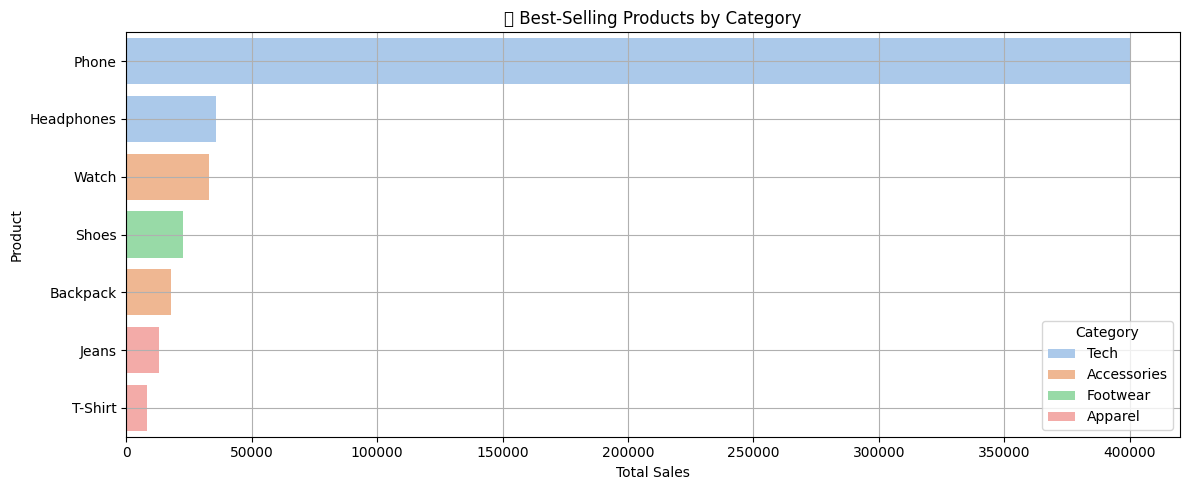

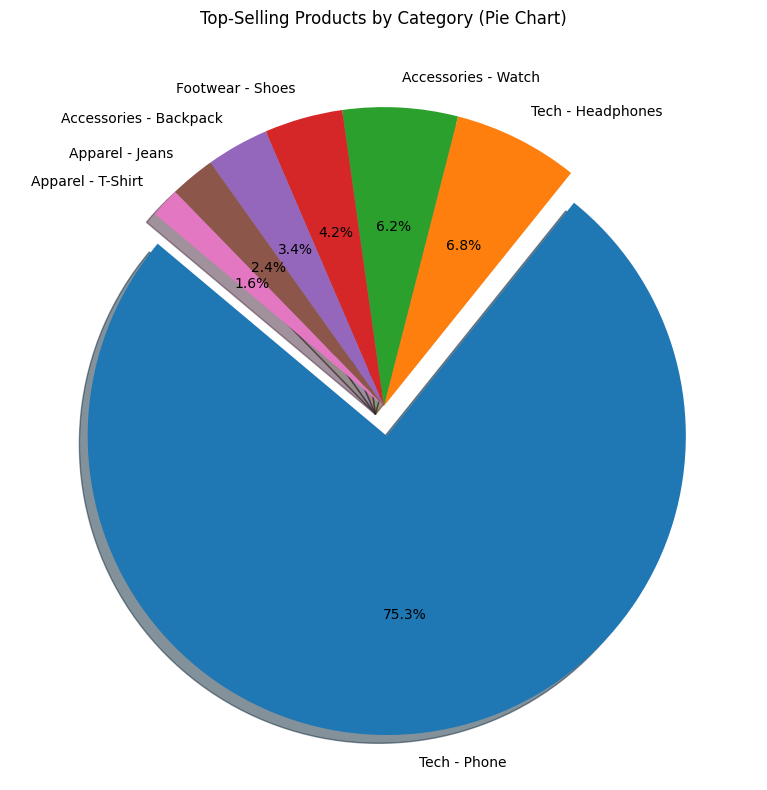

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time

# TASK 1 
data = pd.read_csv('sales.csv')
data.info()
data.shape
data.columns
data.describe()
data.head()
data['Total_Sales'] = data['Quantity'] * data['Price']
data.head()




# TASK 2

group_data = data.groupby('Product', as_index=False)['Total_Sales'].sum()
sorted_data = group_data.sort_values(by='Total_Sales', ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(sorted_data['Product'], sorted_data['Total_Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Total Sales per Product')
plt.grid(True)
plt.tight_layout()
plt.show()



# Total Sales per Category

group_category = data.groupby('Category',as_index = False)['Total_Sales'].sum()
group_sort =group_category.sort_values(by= 'Total_Sales',ascending = False)
plt.figure(figsize = (12,4))
plt.barh(group_sort['Category'] , group_sort['Total_Sales'].astype(int),color = 'skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Category of Products')
plt.title(' Total Sales per Category')
plt.tight_layout()
plt.grid(True)
plt.show()

sum= data['Category'].unique()
sum1  = data['Category'].value_counts()


plt.pie(sum1, labels = sum , autopct = '%1.1f%%' , shadow = True , explode = (0,0,0,0))
plt.title('Contribution of each Category')
plt.show()


# 📊 Task 3: Sales Trend Over Time

data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize = (12,4))
time_sum = data.groupby('Date',as_index = False)['Total_Sales'].sum()
time_sum_sort = time_sum.sort_values(by = 'Date' ,  ascending = True)

plt.plot(time_sum_sort['Date'] , time_sum_sort['Total_Sales'] , label = 'Total Sales ' , color = 'skyblue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



# 📊 Task 4: Total Sales by Region / City / State

region_sale_State = data.groupby('State',as_index = False)['Total_Sales'].sum()
region_sale_State = region_sale_State.sort_values(by='Total_Sales',ascending = True)

plt.figure(figsize = (12,4))
plt.barh(region_sale_State['State'], region_sale_State['Total_Sales'], color='skyblue')

plt.xlabel('Total_Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# PieChart

plt.pie(region_sale_State['Total_Sales'] , labels = region_sale_State['State'], autopct = '%1.1f%%',shadow = True , explode =(0,0,0,0,0.1 ))
plt.title('Total Sales by State in Percentage')
plt.show()



region_sale_City = data.groupby('City',as_index = False)['Total_Sales'].sum()
region_sale_City =  region_sale_City.sort_values(by='Total_Sales',ascending = True)

plt.figure(figsize = (12,4))
plt.barh(region_sale_City['City'], region_sale_City['Total_Sales'], color='skyblue')
plt.xlabel('Total_Sales')
plt.ylabel('City')
plt.title('Total Sales by City')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# PieChart

plt.pie(region_sale_City['Total_Sales'] , labels = region_sale_City['City'], autopct = '%1.1f%%',shadow = True, explode =(0,0,0,0,0,0,0.1 ) )
plt.title('Total Sales by City in Percentage')
plt.show()
data.head()



# 📦 Task 6: Best-Selling Products (Overall + by Category)

# Overall

data_overall = data.groupby('Product',as_index = False)['Total_Sales'].sum()
data_overall = data_overall.sort_values(by = 'Total_Sales')

plt.figure(figsize = (12,4))
plt.barh(data_overall['Product'], data_overall['Total_Sales'], color='skyblue')
plt.xlabel('Total_Sales')
plt.ylabel('Product')
plt.title(' Best-Selling Products ')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.pie(data_overall['Total_Sales'] , labels = data_overall['Product'], autopct = '%1.1f%%',shadow = True, explode =(0,0,0,0,0,0,0.1 ) )
plt.title('Best-Selling Products')
plt.show()



#  Category and Product
data_Category = data.groupby(['Category', 'Product'], as_index=False)['Total_Sales'].sum()
data_Category = data_Category.sort_values(by='Total_Sales', ascending=False)
top_per_category = data_Category.groupby('Category').head(2)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_per_category, x='Total_Sales', y='Product', hue='Category', palette='pastel')
plt.title('🔥 Best-Selling Products by Category')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

labels = top_per_category['Category'] + ' - ' + top_per_category['Product']

plt.figure(figsize=(8, 8))
plt.pie(
    top_per_category['Total_Sales'],
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    explode = (0.1,0,0,0,0,0,0)
)

plt.title('Top-Selling Products by Category (Pie Chart)')
plt.tight_layout()
plt.show()
